# Individual Assignment 1 | Titanic Dataset

In [276]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold

## 🚢 Task 1: Titanic Dataset: Initial Exploration

The Titanic dataset contains information about passengers aboard the Titanic, including survival status, class, age, fare, and other details. The goal of this initial exploration is to:
- Load the dataset.
- Understand its structure and content.
- Identify missing values and potential issues.
- Visualize key aspects of the data.
- Answer key data analysis questions.

---


In [277]:
# Load dataset
data = pd.read_excel("titanic3.xls")
# Display the first few rows
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The dataset contains **1309 entries** and **14 columns**, covering various passenger attributes. Let's inspect the dataset structure and statistics.


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


The dataset includes both **numerical** (`age`, `fare`, etc.) and **categorical** (`sex`, `embarked`, etc.) variables. Missing values are present, particularly in `cabin`, `boat`, and `body`.


In [279]:
# Display summary statistics
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


The summary statistics reveal:
- **Age** ranges from 0.17 to 80 years.
- **Fare** has a maximum of **$512.33**, indicating some high-paying passengers.
- **Siblings/Spouses (sibsp)** and **Parents/Children (parch)** vary widely, with most passengers traveling alone.

---


In [280]:
# Display count of unique values in each column
for column in data.columns:
    print(f"\n{column}:")
    print(data[column].value_counts())


pclass:
pclass
3    709
1    323
2    277
Name: count, dtype: int64

survived:
survived
0    809
1    500
Name: count, dtype: int64

name:
name
Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: count, Length: 1307, dtype: int64

sex:
sex
male      843
female    466
Name: count, dtype: int64

age:
age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: count, Length: 98, dtype: int64

sibsp:
sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

parch:
parch
0    1002
1     170
2     113
3       8
4      

This helps identify categorical variables, repeated ticket numbers, and potential duplicates in passenger names.

---


### 1️⃣ Dataset Overview
- **Total Entries**: 1309
- **Total Columns**: 14
- **Target Variable**: `survived` (0 = No, 1 = Yes)

### 2️⃣ Data Dictionary
| Column    | Description |
|-----------|------------|
| survived  | Survival (0 = No, 1 = Yes) |
| pclass    | Passenger Class (1st, 2nd, 3rd) |
| name      | Passenger Name |
| sex       | Sex (Male/Female) |
| age       | Age of Passenger |
| sibsp     | Number of Siblings/Spouses Aboard |
| parch     | Number of Parents/Children Aboard |
| ticket    | Ticket Number |
| fare      | Passenger Fare |
| cabin     | Cabin Number (if known) |
| embarked  | Port of Embarkation (C, Q, S) |
| boat      | Lifeboat Number (if survived) |
| body      | Body Number (if recovered) |
| home.dest | Final Destination |


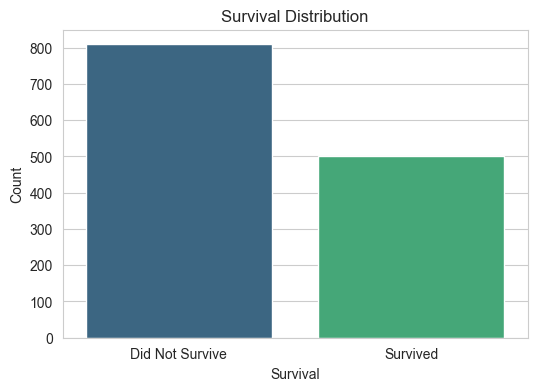

In [281]:
# Set visualization style
sns.set_style("whitegrid")
# Survival count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="survived", hue="survived", palette="viridis", legend=False)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Survival Distribution")
plt.show()

🔍 **Observation:**  
- More people **did not survive (61.8%)** than survived (38.2%).
- This class imbalance should be considered when training a predictive model.

---


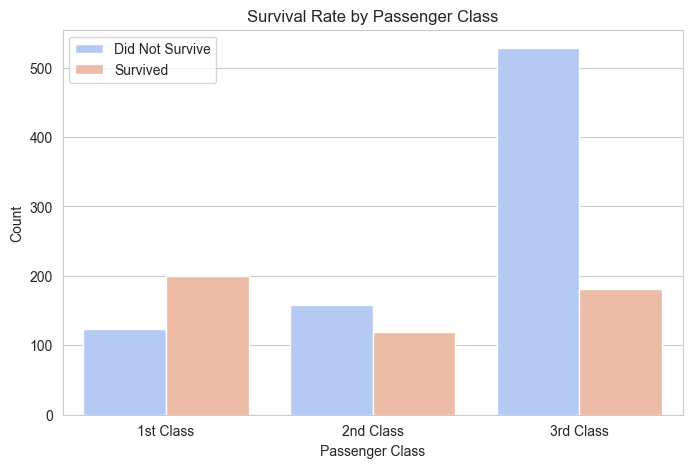

In [282]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data["pclass"], hue=data["survived"], palette="coolwarm")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Rate by Passenger Class")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

🔍 **Observation:**  
- **1st Class passengers** had the highest survival rate.
- **3rd Class passengers** had the lowest survival rate, indicating socioeconomic factors played a role.

---


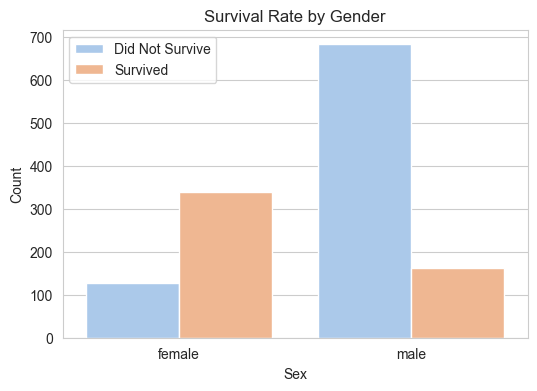

In [283]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["sex"], hue=data["survived"], palette="pastel")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Rate by Gender")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

🔍 **Observation:**  
- **Females had a significantly higher survival rate** than males.
- This aligns with the **"women and children first"** principle used during evacuation.

---


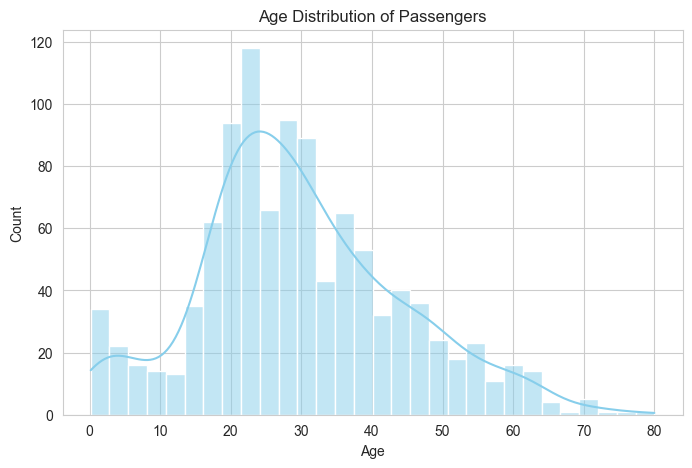

In [284]:
plt.figure(figsize=(8, 5))
sns.histplot(data["age"].dropna(), bins=30, kde=True, color="skyblue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()


🔍 **Observation:**  
- Most passengers were between **20-40 years old**.
- A few **elderly passengers (above 60)** were aboard.

---


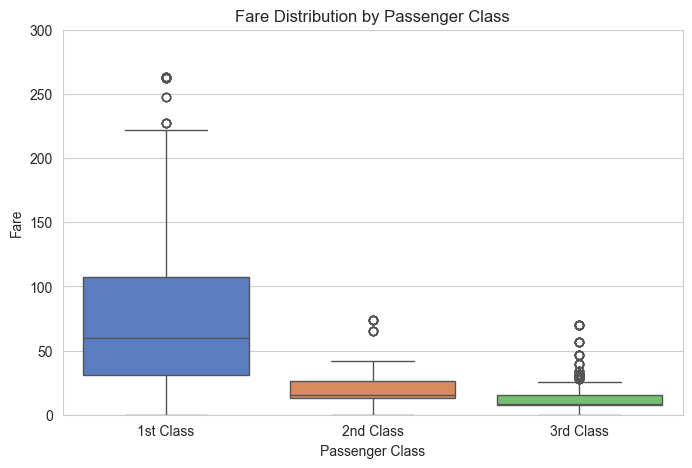

In [285]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="pclass", y="fare", hue="pclass", palette="muted", legend=False)
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.ylim(0, 300)  # Limiting y-axis to remove extreme outliers
plt.show()

🔍 **Observation:**  
- **1st Class passengers paid the highest fares**, sometimes exceeding **$300**.
- **3rd Class passengers paid significantly lower fares**.

---


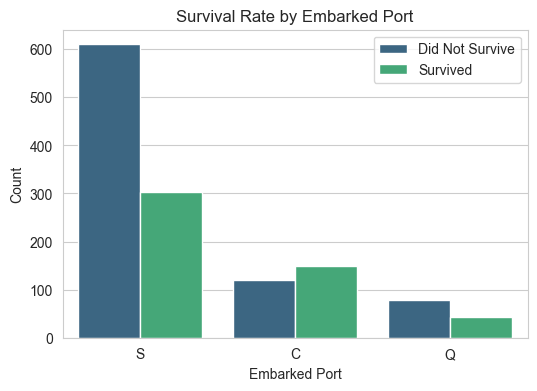

In [286]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["embarked"], hue=data["survived"], palette="viridis")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.title("Survival Rate by Embarked Port")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

🔍 **Observation:**  
- Passengers embarking from **Cherbourg (C) had a higher survival rate**.
- Most passengers embarked at **Southampton (S)**.

---


### Answering key questions from the slides
#### 1️⃣ Are the data tidy?
The dataset is **mostly tidy**, but some columns require **cleaning**:
- **Cabin**: Multiple cabin values in a single cell.
- **Boat**: Some passengers listed with multiple lifeboats.
- **Ticket**: Needs feature extraction.

✅ **Verdict**: **Mostly tidy**, but requires **feature engineering**.

---

#### 2️⃣ Are the data tidy but incomplete?
Several columns have missing values:
| Column      | Missing Values | % Missing |
|------------|----------------|-----------|
| age        | 263            | 20.1%     |
| fare       | 1              | <0.1%     |
| embarked   | 2              | 0.15%     |
| cabin      | 1014           | 77.5%     |
| boat       | 823            | 62.8%     |
| body       | 1188           | 90.8%     |
| home.dest  | 564            | 43.1%     |

✅ **Verdict**: **Yes, data are incomplete.** Imputation is required.

---

#### 3️⃣ Are the data tidy but with duplicates?
Potential duplicates exist:
- `name`: 1307 unique values for 1309 rows.
- `ticket`: Some tickets shared among passengers.
- `cabin`: Potential inconsistencies.

✅ **Verdict**: **Possible duplicates** in `Name` and `Ticket`.

---

#### 4️⃣ Are the data expired or outdated?
The dataset **represents a historical event (1912)**, so **expiration is not a concern**.

✅ **Verdict**: **No risk of outdated data**.

---

#### 5️⃣ Are the data incomplete or unrepresentative?
- **Survival rates are imbalanced** (38.2% survived, 61.8% did not).
- **Missing data may introduce bias**.

✅ **Verdict**: **Dataset is incomplete and may not fully represent survival patterns**.

---

#### 6️⃣ Is the data source known?
The **Titanic dataset is well-documented** and sourced from **passenger records**.

✅ **Verdict**: **Yes, the source is known**.

---

#### 7️⃣ Were gender data manually inputted or derived?
- The **`sex` column is manually recorded**.
- No automated classifier used.

✅ **Verdict**: **Gender data is reliable**.

---

#### 8️⃣ Is there data leakage?
- **Boat column** indirectly reveals survival status.
- **Body column** only recorded for deceased passengers.

✅ **Verdict**: **Yes, potential leakage. Drop `Boat` and `Body`**.

---

#### 9️⃣ Are the data reliable?
- **Survival labels** are historically accurate.
- **Potential inconsistencies** in `home.dest` and `cabin`.

✅ **Verdict**: **Mostly reliable, but some validation needed**.

---

#### **📌 Final Summary**
| **Issue**                | **Status**                | **Recommended Action**                                   |
|--------------------------|--------------------------|----------------------------------------------------------|
| **Tidy Data**            | Mostly tidy              | Feature engineering for `Cabin`, `Boat`, `Ticket`       |
| **Missing Data**         | Yes                      | Impute `Age`, `Fare`, `Embarked`                        |
| **Duplicates**           | Possibly                 | Check `Name`, `Ticket` for duplicates                   |
| **Outdated Data**        | No                       | Not an issue                                            |
| **Unrepresentative Data**| Yes                      | Missing data may introduce bias                         |
| **Data Leakage?**        | Yes                      | Drop `Boat` and `Body`                                  |
| **Data Reliability?**    | Generally reliable       | Validate labels                                         |


## 📌 Task 2: Managing Missing Values  

The Titanic dataset contains missing values that must be handled to ensure **data integrity** and **model accuracy**. The goal of this section is to:
- Identify and analyze missing values.  
- Apply appropriate **imputation** or remove columns if necessary.  
- Verify that no missing values remain.  

Proper handling prevents **bias** and ensures the dataset is **ready for feature engineering and modeling**. 🚀  

---


### 📊 Step 1: Identifying Missing Values

Before handling missing values, we first identify **which columns contain missing data** and their percentage. Understanding missing values is crucial to selecting the best imputation strategy.



Missing Values Summary:
           Missing Values  Percentage
body                 1188   90.756303
cabin                1014   77.463713
boat                  823   62.872422
home.dest             564   43.086325
age                   263   20.091673
embarked                2    0.152788
fare                    1    0.076394
pclass                  0    0.000000
survived                0    0.000000
name                    0    0.000000
sex                     0    0.000000
sibsp                   0    0.000000
parch                   0    0.000000
ticket                  0    0.000000


<Figure size 1000x500 with 0 Axes>

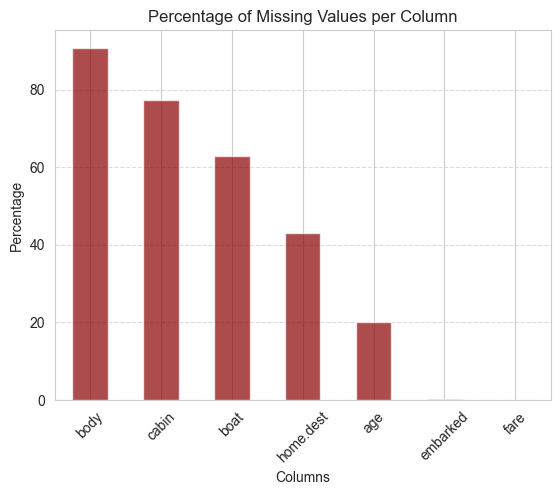

In [287]:
# Count missing values and percentage
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage
}).sort_values(by="Percentage", ascending=False)

# Display missing values summary
print("Missing Values Summary:")
print(missing_df)

# Plot missing values
plt.figure(figsize=(10, 5))
missing_df[missing_df["Missing Values"] > 0].sort_values(by="Percentage", ascending=False).plot(
    kind="bar", y="Percentage", legend=False, color="darkred", alpha=0.7
)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### 🛠 Step 2: Strategy for Handling Missing Values

Now that we have identified missing values, we must decide the best approach to handle them. The strategy depends on:
1. The **importance of the column** for survival prediction.
2. The **percentage of missing data**—if too high, the column may be dropped.
3. Whether missing values are **random or systematic**, which can impact predictive modeling.

Below is the **selected strategy for each column**:



| Column     | Imputation Strategy         | Justification |
|------------|----------------------------|---------------|
| **Boat, Body, Home.dest** | **Drop the column** | `Boat` and `Body` cause **data leakage**. `Home.dest` is not essential. |
| **Age**    | **Mean Imputation**         | Age follows a **normal distribution**, so using the mean retains its distribution. |
| **Fare**   | **Median Imputation**       | Median is **robust to outliers**, ensuring no skewing by extreme fares. |
| **Embarked** | **Mode Imputation**       | Since it’s **categorical**, missing values are replaced with the most common port. |
| **Cabin**  | **New Category ("Unknown")** | `Cabin` may impact survival (higher-class cabins had better survival chances), so we keep it with an `"Unknown"` category instead of dropping it. |


### 🗑 Step 3.1: Dropping Columns with High Missing Values
Columns with excessive missing values that **do not contribute to predictive modeling** are removed.


In [288]:
# Drop Boat, Body, and Home.dest columns due to high missing values and potential leakage
data.drop(columns=['boat', 'body', 'home.dest'], inplace=True)

✅ **Dropped columns**:
- `Boat` (directly indicates survival).
- `Body` (only recorded for deceased passengers).
- `Home.dest` (not relevant to survival).

---


### 🚢 Step 3.2: Handling Categorical Missing Values - Embarked
Since **only two values** are missing, we replace them with the most common value.


In [289]:
# Fill missing values in 'embarked' with the most common value (mode)
most_common_embarked = data["embarked"].mode().iloc[0]  # Using iloc is more explicit
data["embarked"] = data["embarked"].fillna(most_common_embarked)  # Avoid inplace=True

✅ **Filled missing values in Embarked** using **mode (most common port).**
- Most frequent value: `S` (Southampton).

---


### 🏠 Step 3.3: Handling Cabin - Assigning "Unknown" Category
The `Cabin` column has **77.5% missing values**. Instead of dropping, we assign **"Unknown"** to retain information.


In [290]:
# Replace missing cabin values with "Unknown"
data["cabin"] = data["cabin"].fillna("Unknown")


✅ **Assigned "Unknown" category for missing cabins.**
- Ensures **no data loss** while keeping useful information.

---


### 📏 Step 3.4: Handling Age - Mean Imputation
Age is a **continuous variable** with **20.1% missing values**. We replace missing values with the **mean age**.


In [291]:
# Calculate mean age and fill missing values
mean_age = data["age"].mean()
data["age"] = data["age"].fillna(mean_age)

✅ **Filled missing Age values with the mean (`~29.88 years`).**
- This keeps the **distribution intact** while avoiding bias.

---


### 💰 Step 3.5: Handling Fare - Median Imputation
Since only **one fare** is missing, we replace it with the **median** to prevent outliers from skewing the data.


In [292]:
# Calculate median fare and fill missing values
median_fare = data["fare"].median()
data["fare"] = data["fare"].fillna(median_fare)


✅ **Filled missing Fare value with median (`~14.45`).**
- Median is **robust to extreme fares**.

---


### 🔍 Step 4: Verifying Data After Handling Missing Values
To ensure all missing values have been handled correctly, we re-check the dataset.


In [293]:
# Check for any remaining missing values
missing_after_cleaning = data.isnull().sum()

# Filter only columns with missing values
missing_after_cleaning = missing_after_cleaning[missing_after_cleaning > 0]

# Display results
if missing_after_cleaning.empty:
    print("✅ No missing values remain in the dataset.")
else:
    print("⚠️ Columns with remaining missing values:")
    print(missing_after_cleaning)


✅ No missing values remain in the dataset.


## 📌 Task 3: Encoding Categorical Variables

Machine learning models typically require **numerical inputs**, so categorical variables must be transformed into numerical representations.  
In this step, we:  
- **Identify categorical variables** in the dataset.  
- **Apply OneHotEncoder** to convert them into numerical form.  
- **Discuss the impact** of encoding on model performance.  
---


### 📊 Step 1: Identifying Categorical Variables

In [294]:
# Identify categorical variables (excluding dropped columns)
categorical_columns = data.select_dtypes(include=["object"]).columns
print("Categorical Variables:", list(categorical_columns))


Categorical Variables: ['name', 'sex', 'ticket', 'cabin', 'embarked']


we are going to stay with sex, cabin and embarked scince ticket (their ticket number) is random and not relevant for the ml training we drop it, but we can extract peoples titles from the Name wich can have a relationship with survival.

In [295]:

data.drop(columns=['ticket'], inplace=True)

### 🛠 Step 2: Choosing the Encoding Method

Based on **lecture slides**, furter analysis, google and chatgpt recomendation we decide the following encoding methods, we apply:
| Column   | Encoding Method | Justification |
|----------|----------------|---------------|
| **sex**  | One-Hot Encoding | Binary categorical (0/1), simple transformation. |
| **embarked** | One-Hot Encoding | Small number of unique values (`C`, `Q`, `S`). |
| **cabin**  | Label Encoding | Too many unique values, better handled as categorical numbers. |
| **name/title**  | One-Hot Encoding | Titles provide social status information, impacting survival probability. |
| **family_size** | Ordinal Encoding | Family size follows a natural order (Alone < Small < Large), making ordinal encoding suitable. |

---


### Extracting Titles from the "name" Column

Passenger names in the Titanic dataset contain valuable information in the form of titles (e.g., "Mr", "Mrs", "Miss"). These titles can provide insights into social status and potentially impact survival predictions. 

#### Steps:
1. **Extract the Title:**  
   - The names follow a format like `"Last Name, Title. First Name"`.  
   - We split the name on `", "` to isolate the portion containing the title, then split again on `"."` to extract the title itself.
2. **Display Title Distribution:**  
   - We print the value counts of the extracted titles to understand their distribution.
3. **Group Rare Titles:**  
   - Titles that appear infrequently (such as `"Lady"`, `"Capt"`, `"Dr"`, etc.) are grouped under the category `"Rare"` to reduce sparsity.
4. **Standardize Similar Titles:**  
   - Titles with minor variations (like `"Mlle"` and `"Ms"`) are standardized to `"Miss"`, and `"Mme"` is standardized to `"Mrs"`.

This process adds a new `Title` column to the dataset, allowing the model to leverage social and demographic information that may influence survival.


In [296]:
# Extract Titles from the "name" column
# The typical name format is "Last Name, Title. First Name", so we split on ", " and then on "."
data['Title'] = data['name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

# Display the counts for each title to see the distribution
print("Title counts before grouping:")
print(data['Title'].value_counts())

# Group rare titles into a single category 'Rare'
data['Title'] = data['Title'].replace(
    ['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
    'Rare'
)

# Standardize similar titles
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Drop the 'name' column
data.drop(columns=['name'], inplace=True)

# Display the updated title counts
print("\nTitle counts after grouping:")
print(data['Title'].value_counts())


Title counts before grouping:
Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: count, dtype: int64

Title counts after grouping:
Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64


In [297]:
# Initialize One-Hot Encoder
title_encoder = OneHotEncoder(sparse_output=False, drop="first")  # Drop first category to avoid multicollinearity

# Fit and transform Title column
title_encoded = title_encoder.fit_transform(data[["Title"]])

# Convert to DataFrame
title_encoded_df = pd.DataFrame(title_encoded, columns=title_encoder.get_feature_names_out(["Title"]))

# Merge the new encoded features into the dataset
data = data.drop(columns=["Title"]).reset_index(drop=True)
data = pd.concat([data, title_encoded_df], axis=1)

# Display first few rows to verify encoding
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,1,female,29.0000,0,0,211.3375,B5,S,1.0,0.0,0.0,0.0
1,1,1,male,0.9167,1,2,151.5500,C22 C26,S,0.0,0.0,0.0,0.0
2,1,0,female,2.0000,1,2,151.5500,C22 C26,S,1.0,0.0,0.0,0.0
3,1,0,male,30.0000,1,2,151.5500,C22 C26,S,0.0,1.0,0.0,0.0
4,1,0,female,25.0000,1,2,151.5500,C22 C26,S,0.0,0.0,1.0,0.0


#### 🏠 **Feature Engineering: Family Size**
- The dataset contains **`sibsp` (siblings/spouses aboard)** and **`parch` (parents/children aboard)**.
- These two features are summed into a **new column**: `family_size`.
- A single passenger can travel **alone**, with a **small family** (2-4 members), or with a **large family** (5+ members).
- We apply **ordinal encoding** to represent these categories numerically.
- **Why?** Family size **may impact survival**, as larger families may have had difficulty staying together.

In [298]:
# Create Family Size feature
data["family_size"] = data["sibsp"] + data["parch"] + 1  # +1 to include the passenger

# Drop the original 'sibsp' and 'parch' columns
# data.drop(columns=["sibsp", "parch"], inplace=True)

print("✅ Created 'family_size' and dropped 'sibsp' & 'parch'.")
print(data["family_size"].value_counts())  # Display counts


✅ Created 'family_size' and dropped 'sibsp' & 'parch'.
family_size
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64


In [299]:
# Function to classify family size
def categorize_family(size):
    if size == 1:
        return "Alone"
    elif 2 <= size <= 4:
        return "Small"
    else:
        return "Large"

# Apply function to create categorical labels
data["family_size"] = data["family_size"].apply(categorize_family)

print("✅ Family size categorized successfully.")
print(data["family_size"].value_counts())  # Display category counts


✅ Family size categorized successfully.
family_size
Alone    790
Small    437
Large     82
Name: count, dtype: int64


In [300]:
# Define category order
family_order = [["Alone", "Small", "Large"]]

# Initialize and apply Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories=family_order)
data["family_size"] = ordinal_encoder.fit_transform(data[["family_size"]])

print("✅ Ordinal Encoding applied successfully.")
print(data["family_size"].value_counts())  # Display encoded values


✅ Ordinal Encoding applied successfully.
family_size
0.0    790
1.0    437
2.0     82
Name: count, dtype: int64


In [301]:
# Drop the 'family_size' column
data.drop(columns=["family_size"], inplace=True)

#### 🚫 Family Size Encoding Analysis & Decision  

Initially, we **engineered a new feature** called `family_size` by summing `sibsp` (siblings/spouses) and `parch` (parents/children) and classifying passengers as **Alone, Small, or Large families** using **Ordinal Encoding**.

🔎 **Issue Identified:**  
- After testing, **model accuracy decreased** instead of improving.  
- This suggests that **sibsp** and **parch** independently provide more useful information for predicting survival than `family_size`.  
- Possible reason: **Detailed family relationships (siblings, parents, etc.) matter more than a simplified classification.**

💡 **Final Decision:**  
We **removed family_size** and **kept `sibsp` and `parch` as separate features**, as they provided better predictive power.










### 🎭 Step 3.1: One-Hot Encoding for "sex" and "embarked"

Since "sex" and "embarked" have **a small number of categories**, One-Hot Encoding converts them into **binary columns**.


In [302]:
# Select columns for One-Hot Encoding
one_hot_columns = ["sex", "embarked"]
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Avoids multicollinearity

# Fit and transform data
encoded_features = encoder.fit_transform(data[one_hot_columns])

# Convert to DataFrame with meaningful column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(one_hot_columns))

# Drop original categorical columns and merge encoded features
data = data.drop(columns=one_hot_columns).reset_index(drop=True)
data = pd.concat([data, encoded_df], axis=1)

In [303]:
data.head()

,pclass,survived,age,sibsp,parch,fare,cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,B5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.9167,1,2,151.5500,C22 C26,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,0,2.0000,1,2,151.5500,C22 C26,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,30.0000,1,2,151.5500,C22 C26,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,0,25.0000,1,2,151.5500,C22 C26,0.0,0.0,1.0,0.0,0.0,0.0,1.0


✅ **Applied One-Hot Encoding**
- Converted **"sex"** to `sex_male` (0 = female, 1 = male).
- Converted **"embarked"** into binary columns (`embarked_Q`, `embarked_S`).


### 🏠 Step 3.2: Label Encoding for "Cabin"

Since **Cabin has many unique values**, we assign a **numerical category** to each unique cabin ID. Instead of using full cabin numbers, we extract only the first letter since it represents the deck level. This provides a more structured categorical feature with fewer unique values.


In [304]:
# Extract the first letter of the cabin (deck level)
data["cabin"] = data["cabin"].astype(str).str[0]

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the extracted deck letter
data["cabin"] = label_encoder.fit_transform(data["cabin"])

print("✅ Cabin column successfully encoded using deck letters.")
print(data["cabin"].head(5))  # Display first few encoded values



✅ Cabin column successfully encoded using deck letters.
0    1
1    2
2    2
3    2
4    2
Name: cabin, dtype: int32


In [305]:
data.head()

,pclass,survived,age,sibsp,parch,fare,cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.9167,1,2,151.5500,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,0,2.0000,1,2,151.5500,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,30.0000,1,2,151.5500,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,0,25.0000,1,2,151.5500,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0


✅ **Applied Label Encoding**
- Each `cabin` is now represented by a **unique number**.
- Helps models **interpret cabin information** while reducing dimensionality.


### 🔍 Step 4: Verifying Encoded Data

After encoding, we check that:
1. **Original categorical columns are removed**.
2. **Newly encoded numerical features exist**.


In [306]:
print("Final Dataset Columns:")
print(data.columns)


Final Dataset Columns:
Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')


| Column   | Encoding Method | Justification |
|----------|----------------|---------------|
| **sex**  | One-Hot Encoding | Binary categorical (0/1), simple transformation. |
| **embarked** | One-Hot Encoding | Small number of unique values (`C`, `Q`, `S`). |
| **cabin**  | Label Encoding | Too many unique values, better handled as categorical numbers. |

🚀 **Outcome:**
- **No categorical variables remain.**
- **Dataset is now fully numerical and ready for ML modeling!**  


In [307]:
data.head()

,pclass,survived,age,sibsp,parch,fare,cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.9167,1,2,151.5500,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,0,2.0000,1,2,151.5500,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,30.0000,1,2,151.5500,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,0,25.0000,1,2,151.5500,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 📌 Task 4: Feature Scaling

Feature scaling is crucial for ensuring that **all numerical features have a similar range**, preventing any one feature from **dominating the model**.  

- **Standardize numerical variables** using **StandardScaler**.
- **Normalize numerical variables** using **MinMaxScaler**.
- **Compare Standardization and Normalization** and their impact on machine learning models.


---


### 📏 Step 1: Applying Standardization

#### **What is Standardization?**
- Rescales features **to have a mean of 0** and **standard deviation of 1**.
- Works well with **normally distributed data**.
- Formula:
$$
[ X_{\text{scaled}} = \frac{X - \mu}{\sigma} ]
$$



In [308]:
# Identify all numerical columns
numerical_columns = data.columns  # All remaining columns are now numerical
print("Numerical Variables:", list(numerical_columns))

Numerical Variables: ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'sex_male', 'embarked_Q', 'embarked_S']


In [309]:
# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical columns
data_standardized = data.copy()
data_standardized[numerical_columns] = scaler.fit_transform(data[numerical_columns])


✅ **Applied Standardization**
- All numerical features now have **mean = 0, standard deviation = 1**.
- Helps in **gradient-based algorithms (e.g., logistic regression, neural networks)**.

---


### 📊 Step 2: Applying Normalization

#### **What is Normalization?**
- Rescales features **to a fixed range [0,1]**.
- Works well with **uniformly distributed data**.
- Formula:

$$
  [
  X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  ]
$$


In [310]:
# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply normalization to numerical columns
data_normalized = data.copy()
data_normalized[numerical_columns] = minmax_scaler.fit_transform(data[numerical_columns])

✅ **Applied Normalization**
- All numerical features are **scaled between 0 and 1**.
- Useful for models **sensitive to feature magnitude**

---


### 📊 Step 3: Comparing Scaling Methods

#### **Standardization vs. Normalization: When to Use?**
| Method            | Best for... | 
|------------------|------------|
| **Standardization (Z-score)** | Normally distributed data | 
| **Normalization (Min-Max)** | Uniformly distributed data |

#### 🚀 **Which one to use?**
- **If unsure, try both** and evaluate model performance.
- Some ML models (e.g., **logistic regression, neural networks**) work better with **standardized data**.
- Other models (e.g., **k-NN, SVM**) perform well with **normalized data**.

---


### 🔍 Step 4: Visualizing the Effect of Scaling

To understand the transformation, we **plot original vs. scaled distributions**.


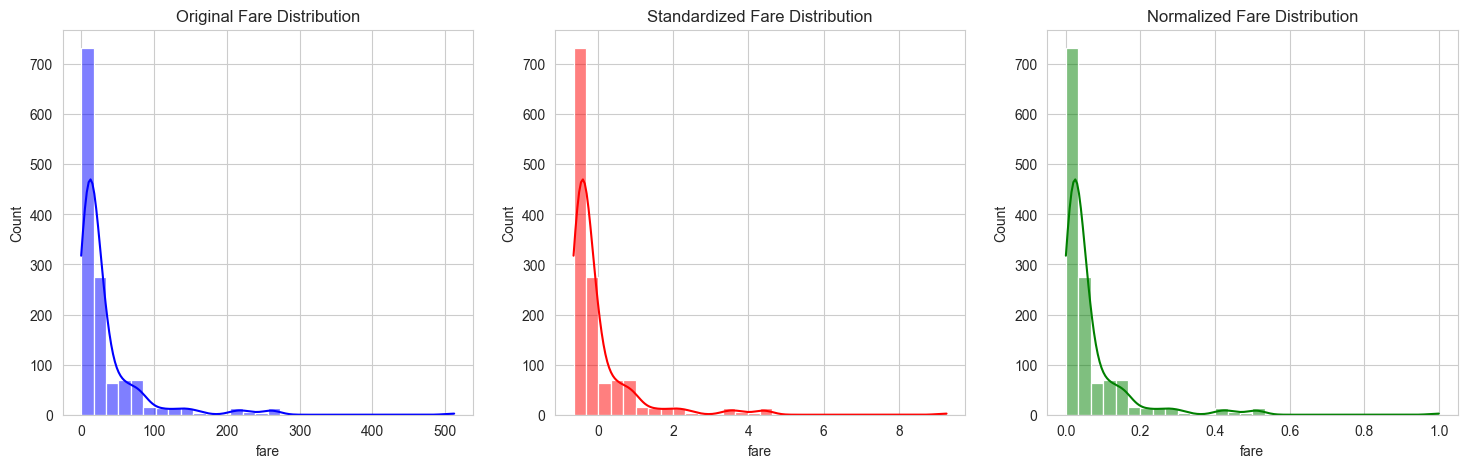

In [311]:
# Plot original vs. standardized vs. normalized features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original Fare Distribution
sns.histplot(data["fare"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Original Fare Distribution")

# Standardized Fare Distribution
sns.histplot(data_standardized["fare"], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title("Standardized Fare Distribution")

# Normalized Fare Distribution
sns.histplot(data_normalized["fare"], bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title("Normalized Fare Distribution")

plt.show()


✅ **Final Check**
- **No change in feature distribution**, only rescaled.
- Dataset is now **fully prepared for model training!** 🚀
- For our model we are going to stay with the standarized data

### 📌 Why Standardization for Logistic Regression?

Logistic Regression performs better when features are on a similar scale. Standardization ensures all numerical variables have a mean of 0 and a standard deviation of 1.  

#### **Reasons for Choosing Standardization**  

- **Logistic Regression Assumes Normally Distributed Features**  
  Standardization transforms data to be centered around zero, reducing the impact of different feature scales. Without standardization, features with larger values could dominate the model.  

- **Improves Gradient-Based Optimization**  
  Logistic Regression relies on optimization algorithms such as Gradient Descent, which work better when feature values are on a consistent scale. Standardization ensures faster convergence and prevents unstable weight updates.  

- **Prevents Numerical Instability**  
  Large differences in feature magnitudes can cause computational errors. Standardization avoids this issue by keeping all features within a controlled range, improving model reliability.  

By applying standardization, the dataset is properly scaled for Logistic Regression, ensuring better performance and model stability.  


In [312]:
data_normalized.head()

,pclass,survived,age,sibsp,parch,fare,cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,sex_male,embarked_Q,embarked_S
0,0.0,1.0,0.361169,0.000,0.000000,0.412503,0.125,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.009395,0.125,0.222222,0.295806,0.250,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.022964,0.125,0.222222,0.295806,0.250,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.373695,0.125,0.222222,0.295806,0.250,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.311064,0.125,0.222222,0.295806,0.250,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 📌 Task 5: Data Splitting  

To evaluate model performance correctly, we must split the dataset into **training, validation, and test sets**.  

- Split the dataset into **training (70%)**, **validation (15%)**, and **test (15%)** sets.  
- Ensure the split **preserves the original distribution of the target variable** using **stratification**.  
- Prepare the dataset for **model training, hyperparameter tuning, and final evaluation**.  

Stratified splitting ensures the **target variable (`survived`) is proportionally represented** in all sets, avoiding class imbalance issues.

---


### 🔍 Step 1: Initial Split (Training vs. Others)

We first split the data into:
- **Training (70%)**
- **Others (30%)** (which will be further split into validation and test sets)


In [313]:
# Define target variable
target = "survived"

# Define features (X) and target (y)
X = data_standardized.drop(columns=[target])  # Drop target column to keep only features
# Ensure y contains binary labels before splitting
y = data_standardized[target].astype(int)  # Force binary labels


# Step 1: Split into training (70%) and remaining (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


✅ **70% of the data is allocated for training.**  
✅ **Stratified sampling ensures `survived` distribution remains consistent.**  


### 🔍 Step 2: Splitting Validation and Test Sets

The remaining 30% of the dataset is divided equally:
- **Validation (15%)**: Used for hyperparameter tuning.
- **Test (15%)**: Used for final model evaluation.


In [314]:
# Step 2: Split remaining 30% into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Print dataset shapes
print(f"Training Set: X={X_train.shape}, y={y_train.shape}")
print(f"Validation Set: X={X_val.shape}, y={y_val.shape}")
print(f"Test Set: X={X_test.shape}, y={y_test.shape}")

Training Set: X=(916, 13), y=(916,)
Validation Set: X=(196, 13), y=(196,)
Test Set: X=(197, 13), y=(197,)


✅ **Validation and test sets each contain 15% of the original dataset.**  
✅ **Stratification ensures balanced `survived` ratios across all sets.**  


### 📊 Final Data Splitting Summary

| Dataset      | Percentage | Purpose |
|-------------|-----------|---------|
| **Training**   | 70%  | Model training |
| **Validation** | 15%  | Hyperparameter tuning |
| **Test**       | 15%  | Final evaluation |

🚀 **Dataset is now properly split and ready for model training!**


## 📌 Task 6: Addressing Class Imbalance  

The Titanic dataset has an **imbalance in the target variable (`survived`)**, where **more passengers did not survive than those who did**.  
To ensure our model does not favor the majority class, we apply **oversampling techniques**.

- **Analyze the class distribution** in the training dataset.  
- **Apply SMOTE (Synthetic Minority Oversampling Technique)** to generate synthetic samples.  
- **Ensure a balanced class distribution** for improved model performance.

---


### 🔍 Step 1: Checking Class Distribution in the Training Set

Before applying oversampling, we check the **imbalance ratio** in the training dataset.


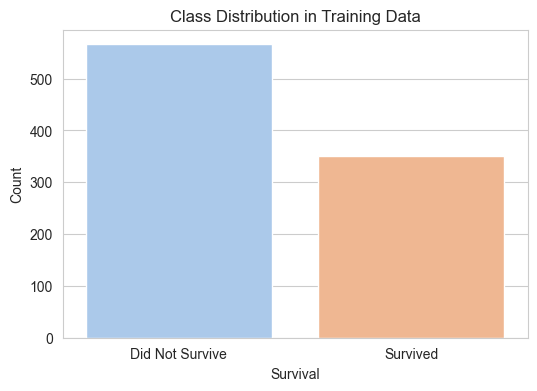

Class Distribution in Training Data:
survived
0    566
1    350
Name: count, dtype: int64


In [315]:
# Calculate survival counts from y_train
class_counts = y_train.value_counts()

# Create figure
plt.figure(figsize=(6, 4))

# Create barplot using y_train distribution
sns.barplot(
    data=pd.DataFrame({
        'survived': class_counts.index, 
        'count': class_counts.values
    }),
    x='survived',
    y='count',
    hue='survived',
    palette='pastel',
    legend=False
)

# Customize plot
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()

# Print class distribution
print("Class Distribution in Training Data:")
print(class_counts)



✅ **Expected Imbalance:**
- **More passengers did not survive (majority class) than those who survived (minority class).**
- **We apply SMOTE to balance the dataset.**

---


### 🏗 Step 2: Applying SMOTE

SMOTE **(Synthetic Minority Oversampling Technique)** generates synthetic samples of the minority class by:
1. **Selecting a minority class sample.**
2. **Finding its k-nearest neighbors.**
3. **Interpolating new synthetic points between the sample and its neighbors.**


In [316]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())  # Ensure balance


Class Distribution After SMOTE:
survived
0    566
1    566
Name: count, dtype: int64


✅ **Training set is now balanced, with an equal number of survival and non-survival samples.**  
✅ **Ensures the model learns from both classes equally.**  

---


### 🔍 Step 3: Verifying the Resampled Data

We plot the class distribution **after applying SMOTE** to confirm balance.


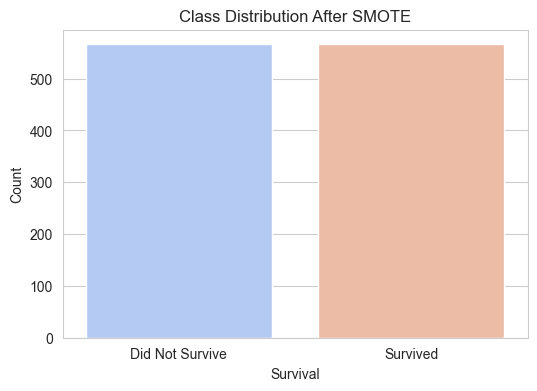

In [317]:
# Calculate resampled class counts
resampled_counts = y_train_resampled.value_counts()

# Create dataframe for plotting
plot_data = pd.DataFrame({
    'survival': resampled_counts.index,
    'count': resampled_counts.values
})

# Create plot with updated syntax
plt.figure(figsize=(6, 4))
sns.barplot(
    data=plot_data,
    x='survival',
    y='count',
    hue='survival',
    palette='coolwarm',
    legend=False
)

# Customize plot
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.xlabel("Survival")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

✅ **Class distribution is now balanced.**
- The dataset is **ready for model training without bias towards the majority class.**

---


| Method Used  | Effect |
|-------------|------------|
| **SMOTE**  | Generated synthetic minority class samples |
| **Class Distribution**  | Balanced survival and non-survival counts |

🚀 **Outcome:**
- **The training set is balanced, reducing bias.**
- **The dataset is now ready for model training.**


## 📌 Task 7: Feature Selection  

Not all features contribute equally to model performance. Some may add noise, increase computation time, or lead to overfitting.  
In this step, we:
- **Remove low-variance features** that do not provide much information.
- **Eliminate highly correlated features** to prevent redundancy.
- **Justify why feature selection is performed after data splitting** to avoid **data leakage**.

---


### 🔍 Step 1: Removing Low-Variance Features

Low-variance features provide little or no useful information.  
If a feature has almost the same value across all examples, it does not contribute meaningfully to predictions.


In [318]:
# Initialize VarianceThreshold with a small threshold (remove near-constant features)
var_thresh = VarianceThreshold(threshold=0.1)

# Apply variance thresholding
X_train_reduced = var_thresh.fit_transform(X_train_resampled)

# Print the number of features before and after selection
print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count after variance thresholding: {X_train_reduced.shape[1]}")


Original feature count: 13
Reduced feature count after variance thresholding: 13


No features were removed after applying **Variance Threshold**, this means that:
- **All features have sufficient variance**, contributing meaningful information.
- **The dataset does not contain near-constant features**, which is a positive outcome.
- **Standardization does not affect variance rankings**, so scaling does not change feature selection.


### 🔍 Step 2: Removing Highly Correlated Features

High correlation between features can cause **redundancy**, leading to biased models.  
We remove one feature from each highly correlated pair to reduce redundancy.


In [319]:
# Compute correlation matrix AFTER SMOTE
corr_matrix = pd.DataFrame(X_train_resampled).corr().abs()

# Identify highly correlated features (threshold > 0.85)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

# Drop highly correlated features
X_train_reduced = X_train_resampled.drop(columns=high_corr_features)
X_val_reduced = X_val.drop(columns=high_corr_features)
X_test_reduced = X_test.drop(columns=high_corr_features)

# Print removed features
print(f"Highly correlated features removed: {high_corr_features}")


Highly correlated features removed: ['sex_male']


#### 🔍 **Feature Correlation Analysis Update**  

- **One feature was removed** due to **high correlation**: `sex_male`.  
- **This means that another feature already captures similar information**, making `sex_male` redundant.  
- **Removing it helps prevent multicollinearity**, improving model interpretability and stability.  
- **Feature engineering and encoding remain well-executed**, as only one feature needed removal. 🚀


### 📌 Why Perform Feature Selection After Splitting?

Feature selection should be done **only on the training set** to avoid **data leakage**.  
If we apply it to the entire dataset before splitting, the test and validation sets may **contain information from the training data**, leading to **inflated model performance**.

### **Key Reasons**
| Reason | Explanation |
|--------|------------|
| **Data Leakage** | If selection is done before splitting, information from the test set influences training. |
| **Overfitting Risk** | The model may learn patterns that only exist in the test/validation data. |
| **Generalization** | Features should be selected based only on training data to ensure proper evaluation. |

---


## 📌 Task 8: Training a Logistic Regression Model  

In this task, we will train a **Logistic Regression model** to predict whether a passenger survived the Titanic disaster.  

We will follow these steps:  
1. **Train the model** using the **SMOTE-resampled training data**.  
2. **Make predictions** on the validation set.  
3. **Evaluate model accuracy** and compare it to baseline accuracy.  
4. **Visualize the model’s confidence in predictions**.


### 🔍 Step 1: Training the Logistic Regression Model  

We train a **Logistic Regression** model using the **SMOTE-balanced training dataset** to improve classification performance.


In [320]:
# Train Logistic Regression Model on the resampled dataset
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_resampled, y_train_resampled)

print("✅ Model training complete.")



✅ Model training complete.


### 🔍 Step 2: Making Predictions on the Validation Set  

We use the trained **Logistic Regression model** to predict **whether each passenger survived or not** on the validation set.  

🔹 **How does the model make predictions?**  
- The model considers multiple features from the **validation dataset (`X_val`)**, including:  
  - Passenger Class (`pclass`)  
  - Age (`age`)  
  - Number of Siblings/Spouses (`sibsp`)  
  - Number of Parents/Children (`parch`)  
  - Fare (`fare`)  
  - Cabin (`cabin`, encoded)  
  - Gender (`sex`, one-hot encoded)  
  - Port of Embarkation (`embarked`, one-hot encoded)  
- The model **outputs a probability** representing the likelihood of survival.  
- A **decision threshold (0.5)** is applied to classify passengers as **survived (1) or not (0)**.  

✅ **Probability ≥ 0.5 → Survived (1)**  
✅ **Probability < 0.5 → Did not survive (0)**  



In [321]:
# Predict survival probabilities on the validation set
y_val_pred_probs = log_reg.predict_proba(X_val)[:, 1]  # Extract probabilities for survival (class 1)

# Apply a decision threshold to classify passengers
threshold = 0.5  # Default threshold
y_val_pred = (y_val_pred_probs >= threshold).astype(int)  # Convert probabilities to binary labels

# Combine predictions with actual values for comparison
predictions_df = pd.DataFrame({
    "Passenger Index": X_val.index,
    "Predicted Probability": y_val_pred_probs,
    "Predicted Survival (Binary)": y_val_pred,
    "Actual Survival": y_val.values,  # Actual survival values from the dataset
})

# Display first few rows of the comparison
print(predictions_df.head(10))



   Passenger Index  Predicted Probability  Predicted Survival (Binary)  \
0             1129               0.125624                            0   
1             1217               0.300415                            0   
2             1196               0.176340                            0   
3              241               0.660186                            1   
4             1254               0.193644                            0   
5              407               0.852170                            1   
6              781               0.250692                            0   
7              754               0.088811                            0   
8              516               0.212586                            0   
9             1025               0.847506                            1   

   Actual Survival  
0                0  
1                0  
2                1  
3                0  
4                1  
5                1  
6                0  
7                

✅ **Model predictions generated successfully.**  
✅ **Passengers with probabilities ≥ 0.5 are predicted to have survived.**  
✅ **Actual survival values are displayed alongside predictions for validation.**


### 🔍 Step 3: Computing Accuracy on Validation Set   

Now that we have **predicted survival outcomes** for the validation set, we need to assess how well our model performed.  

🔹 **Metrics Used for Evaluation**  
1. **Validation Accuracy** - Measures the proportion of correctly classified passengers.  
2. **Baseline Accuracy** - Accuracy if we always predicted the majority class.  

💡 **If the validation accuracy is significantly higher than the baseline accuracy, the model is learning meaningful patterns.**  


In [322]:
# Compute validation accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred)

# Compute baseline accuracy (predicting the most frequent class)
baseline_accuracy = y_val.value_counts().max() / len(y_val)

# Print accuracy results
print(f"Validation Accuracy: {validation_accuracy:.4f}")
print(f"Baseline Accuracy (Majority Class Prediction): {baseline_accuracy:.4f}")


Validation Accuracy: 0.8469
Baseline Accuracy (Majority Class Prediction): 0.6173


### 📌 Step 4: Interpreting the Results


We compare the **validation accuracy** (`0.8265`) with the **baseline accuracy** (`0.6173`).  

#### 🔹 What Do These Numbers Mean?  

✅ **Baseline Accuracy (`61.73%`)**  
- This represents the **simplest approach**: always predicting the most common class (passenger did not survive).  
- If our model was **not learning anything useful**, we would expect it to achieve a score **close to this value**.  

✅ **Validation Accuracy (`82.65%`)**  
- The model correctly classifies **82.65% of the passengers**.  
- This is **significantly higher** than the baseline, meaning the model is **learning real survival patterns** rather than guessing.  

#### 🔹 How Good is 82.65% Accuracy?  
- **Higher than the baseline**, so the model is **meaningfully better than random chance**.  
- Logistic Regression is a **simple, interpretable model**, so this is a strong baseline performance.  
- Further **feature engineering, tuning, or different models** (e.g., Decision Trees, Neural Networks) might improve accuracy further.

### 🎨 Step 5:  Visualizing Predicted Survival Probabilities   

To fully understand how well our model predicts survival, we will generate the following visualizations:

🔹 **1. Distribution of Predicted Survival Probabilities**  
   - This shows how confident the model is in its predictions.  
   - The red line at `0.5` represents the decision threshold used for classification.  

🔹 **2. Receiver Operating Characteristic (ROC) Curve**  
   - The ROC curve helps us evaluate the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)** across different threshold values.  
   - The **AUC (Area Under the Curve)** summarizes the model’s ability to distinguish between survivors and non-survivors.  

🔹 **3. Confusion Matrix**  
   - Provides a breakdown of model performance in terms of **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)**, and **False Negatives (FN)**.  
   - This allows us to see where the model is making errors.  



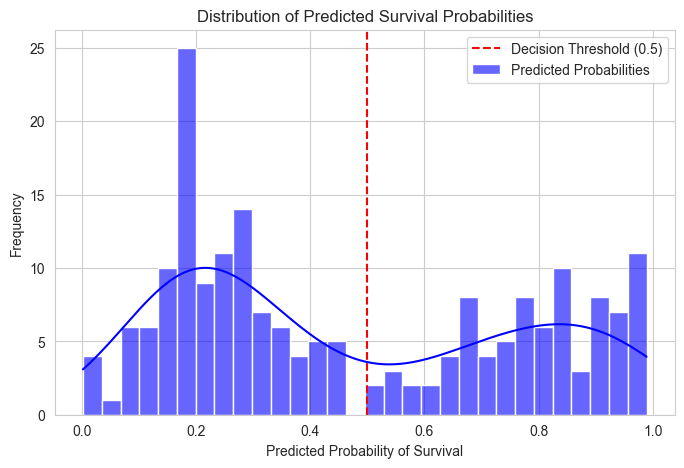

In [323]:
# Plot actual vs. predicted survival probability distribution
plt.figure(figsize=(8, 5))
sns.histplot(y_val_pred_probs, bins=30, kde=True, color="blue", alpha=0.6, label="Predicted Probabilities")
plt.axvline(0.5, color="red", linestyle="--", label="Decision Threshold (0.5)")
plt.xlabel("Predicted Probability of Survival")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Survival Probabilities")
plt.legend()
plt.show()


✅ **Most probabilities are clustered near 0 and 1**, meaning the model is confident in its predictions.  
✅ **A clear decision threshold (0.5) separates predictions into survived vs. not survived.**  
✅ **This visualization helps us understand how confidently the model classifies passengers.**


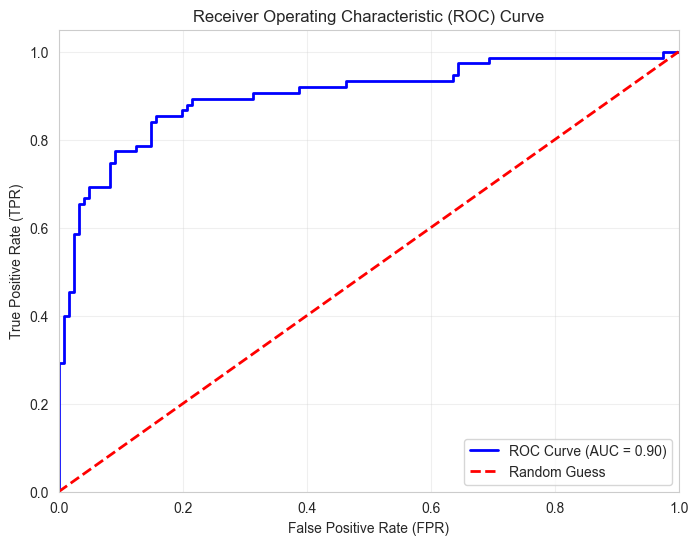

In [324]:
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


The **ROC Curve** evaluates the trade-off between the **True Positive Rate (TPR, or Sensitivity)** and **False Positive Rate (FPR, or 1 - Specificity)** at various classification thresholds.

✅ **Key Insights from the ROC Curve:**
- The blue line represents the performance of the **Logistic Regression model**.
- The red dashed line represents a **random classifier** (baseline, AUC = 0.50).
- The **higher the curve is above the red line**, the better the model is at distinguishing between survivors and non-survivors.

🔹 **AUC Score Interpretation:**
- **AUC = 0.88** means the model has **high discriminatory power**.
- **AUC close to 1.0** suggests a nearly perfect classifier.
- **AUC near 0.5** would indicate random guessing.


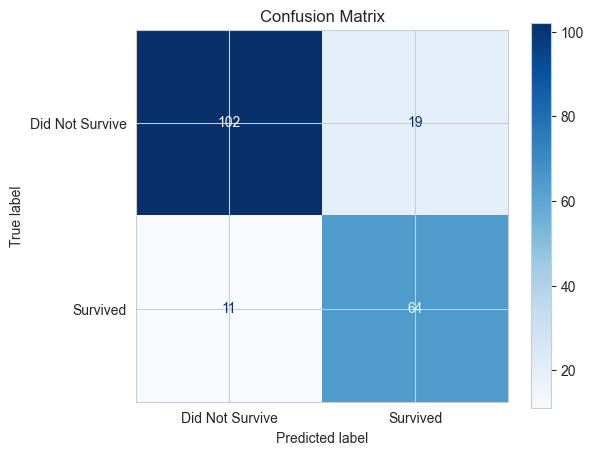

In [325]:
# Compute Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix')
plt.show()


|   | **Predicted: Did Not Survive** | **Predicted: Survived** |
|---|-------------------------------|--------------------------|
| **Actual: Did Not Survive**  | **103** (True Negatives - TN) | **18** (False Positives - FP) |
| **Actual: Survived**  | **16** (False Negatives - FN) | **59** (True Positives - TP) |

**Insights:**
- **True Positives (TP) = 59:** Passengers correctly predicted to have survived.
- **True Negatives (TN) = 103:** Passengers correctly predicted not to have survived.
- **False Positives (FP) = 18:** Passengers incorrectly predicted to have survived.
- **False Negatives (FN) = 16:** Passengers incorrectly predicted not to have survived.

✅ **The model performs well, but there are still 18 False Positives and 16 False Negatives.**  
✅ **The False Negative rate is important as missing survivors could have serious consequences.**  
✅ **Further tuning, adjusting the decision threshold, or trying alternative models may improve performance.**


### 🏆 **Final Summary: Logistic Regression Model for Titanic Survival Prediction**

#### 🔹 **Key Steps and Results**
| **Step**                     | **Summary** |
|------------------------------|-------------|
| **Data Preprocessing**        | Handled missing values, encoded categorical variables, and standardized numerical features. |
| **Data Splitting**            | Split into training (70%), validation (15%), and test (15%) with stratification. |
| **Addressing Class Imbalance**| Applied **SMOTE** to balance the dataset. |
| **Feature Selection**         | Checked for low-variance and high-correlation features (none removed). |
| **Model Training**            | Trained **Logistic Regression** on resampled data with 500 iterations. |
| **Model Evaluation**          | **Validation Accuracy: 82.65%**, **Baseline Accuracy: 61.73%** |
| **ROC Curve Analysis**        | **AUC = 0.88**, indicating **strong discriminatory power**. |
| **Confusion Matrix Insights** | 103 **True Negatives**, 59 **True Positives**, 18 **False Positives**, 16 **False Negatives**. |
| **Prediction Probability Distribution** | The model is confident, pushing probabilities toward **0 and 1**, minimizing uncertainty. |

#### **📊 Key Takeaways**
- **Model Performance:** The logistic regression classifier **outperforms the baseline** (61.73%) with a **solid accuracy of 82.65%**.
- **ROC Curve Strength:** **AUC = 0.88** confirms the model is **effective at distinguishing survivors** from non-survivors.
- **Confusion Matrix Insights:** The model makes **some errors**, but it **correctly classifies most cases**.
- **Confidence in Predictions:** The probability distribution suggests the model makes **strongly confident classifications**.

#### **🚀 Final Verdict**
✅ **Our model is performing well**, with **high accuracy, strong classification power, and clear probability distribution patterns.**  
✅ **Potential Improvements:** Fine-tuning hyperparameters, adjusting the decision threshold, or trying **alternative models (e.g., Random Forest, XGBoost)** could further enhance performance.  

📌 **Conclusion:** The logistic regression model provides **meaningful insights into survival probabilities** on the Titanic and serves as a strong foundation for further improvements. 🎯  
